<a href="https://colab.research.google.com/github/sanjogmish/Telecom_Churn_Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np

In [10]:
filepath='/content/drive/MyDrive/Almabetter/project/Telecom Churn.csv'
df=pd.read_csv(filepath)

In [56]:
df.head(15)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [13]:
type(df['State'][0])

str

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import seaborn as sns

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


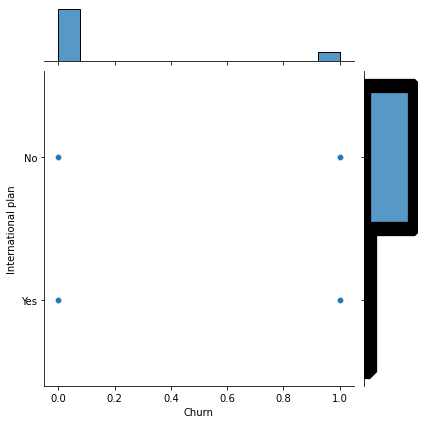

In [16]:
sns.jointplot(x='Churn', y='International plan', data=df)

In [17]:
df.groupby('International plan')['Churn'].value_counts()

International plan  Churn
No                  False    2664
                    True      346
Yes                 False     186
                    True      137
Name: Churn, dtype: int64

In [18]:
df1=df.groupby('Number vmail messages')['Churn'].value_counts()

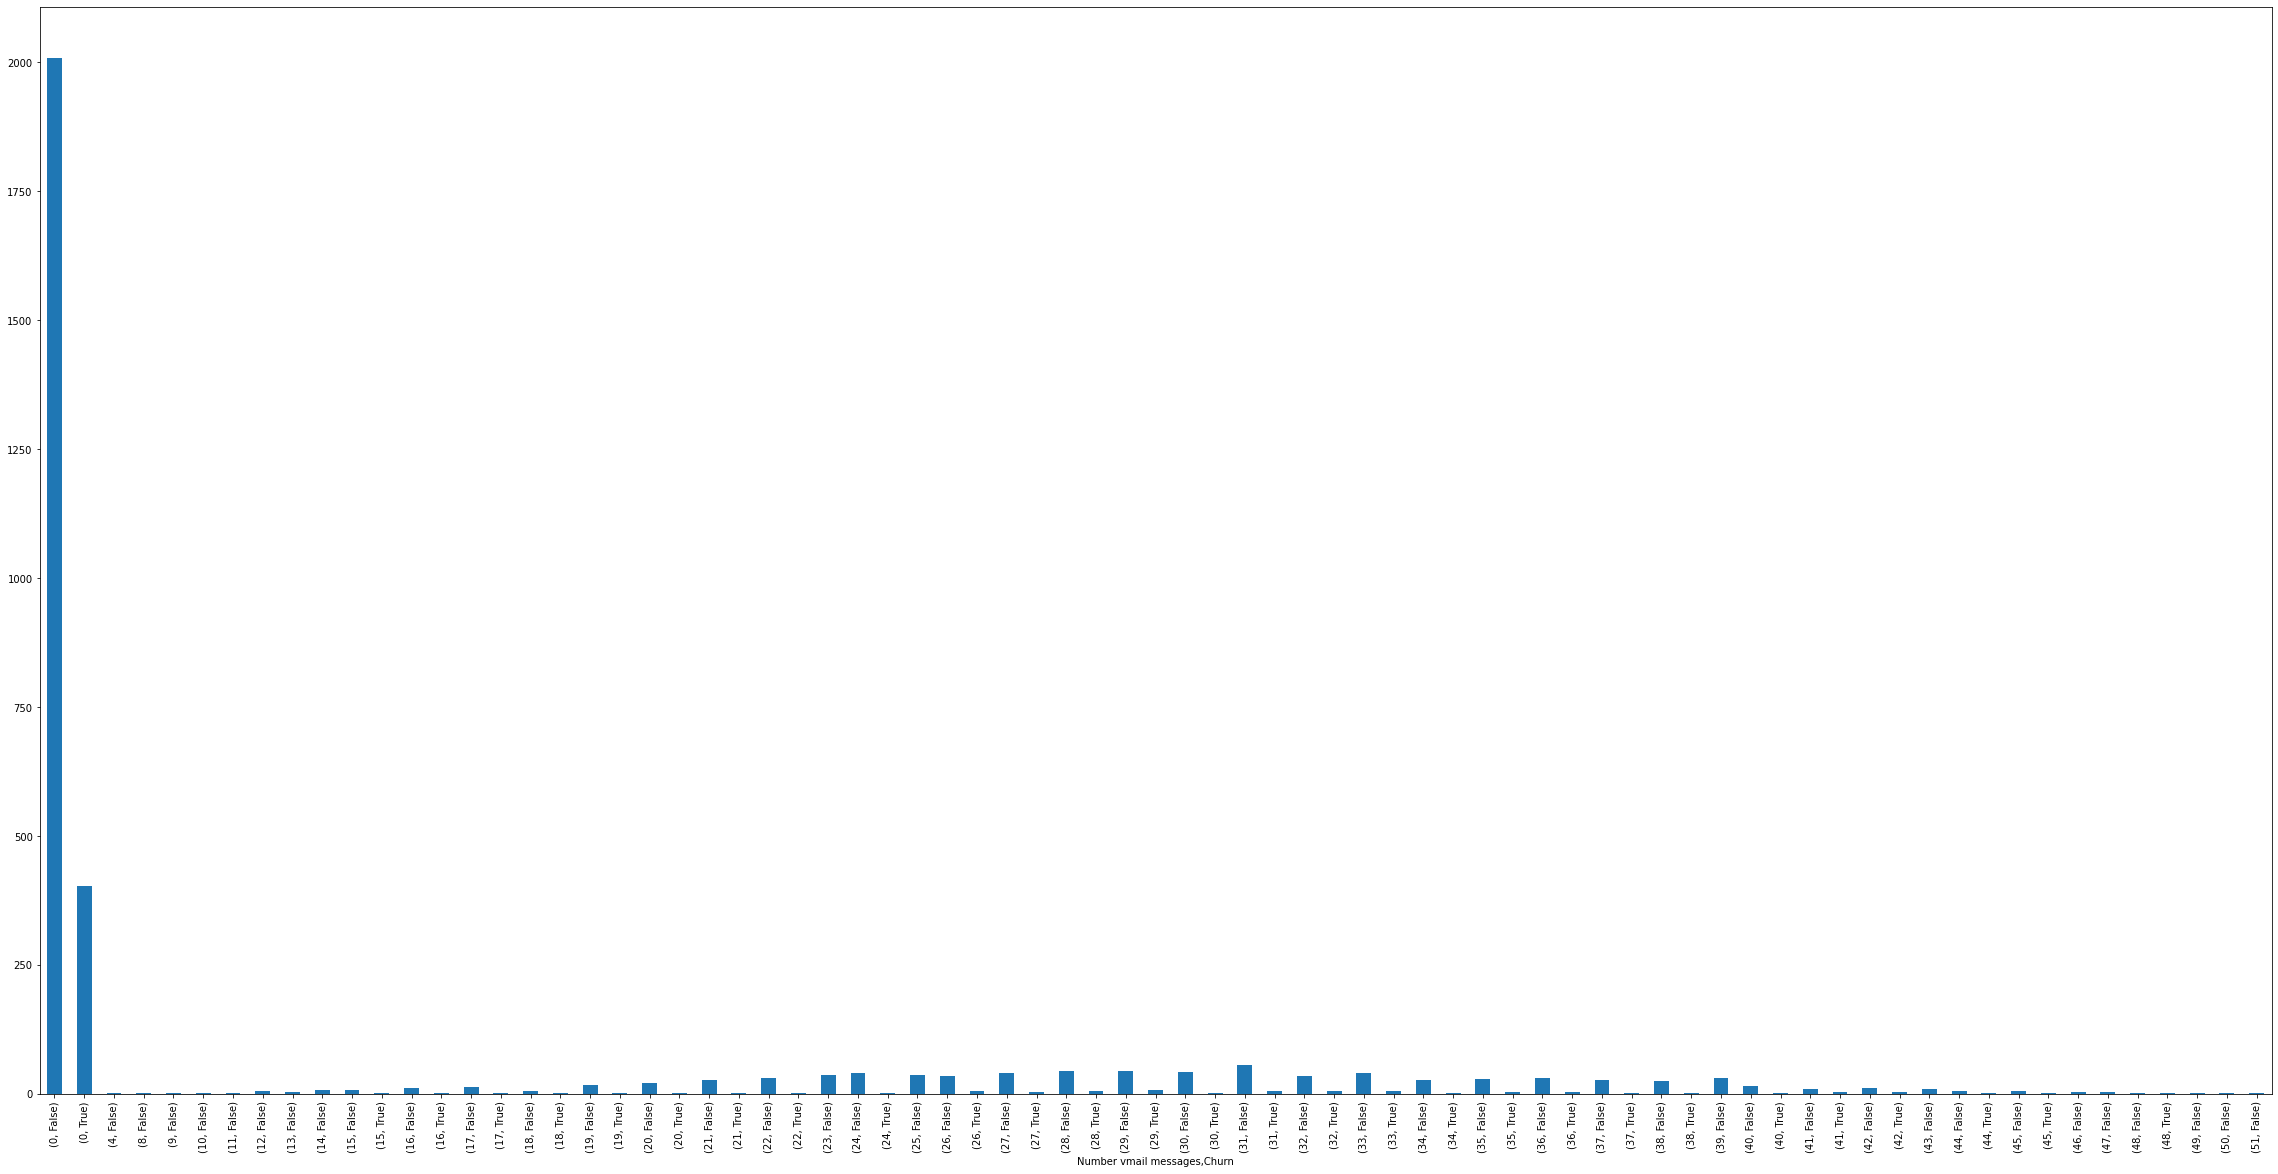

In [19]:
plt.rcParams['figure.figsize'] = (40, 20)
df1.plot(kind='bar')

In [20]:
df.groupby('Area code')['Churn'].value_counts()

Area code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64

In [21]:
df['Total day calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Total day calls, dtype: float64

In [22]:
for i in list(df.columns):
  print(i)
  print(df.groupby('Churn')[i].describe())

State
      count unique top freq
Churn                      
False  2850     51  WV   96
True    483     51  TX   18
Account length
        count        mean       std  min   25%    50%    75%    max
Churn                                                              
False  2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0
True    483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0
Area code
        count        mean        std    min    25%    50%    75%    max
Churn                                                                  
False  2850.0  437.074737  42.306156  408.0  408.0  415.0  510.0  510.0
True    483.0  437.817805  42.792270  408.0  408.0  415.0  510.0  510.0
International plan
      count unique top  freq
Churn                       
False  2850      2  No  2664
True    483      2  No   346
Voice mail plan
      count unique top  freq
Churn                       
False  2850      2  No  2008
True    483      2  No   403
Number vmail messages
        

In [23]:
for i in list(df.columns[1:]):
  print(i)
  print(df.groupby('State')[i].describe())

Account length
       count        mean        std   min    25%    50%     75%    max
State                                                                 
AK      52.0   97.192308  38.300176   1.0  60.50  102.0  126.25  177.0
AL      80.0   98.025000  41.539969   8.0  72.75   95.0  121.25  200.0
AR      55.0   96.981818  37.007252   5.0  76.50   98.0  116.00  185.0
AZ      64.0  100.468750  32.263778  12.0  82.75   97.0  122.50  192.0
CA      34.0   99.235294  33.738800  33.0  77.50   95.5  119.00  185.0
CO      66.0  102.545455  37.815822  22.0  74.50  103.5  127.25  192.0
CT      74.0   99.040541  42.682465   3.0  72.25   99.0  124.75  212.0
DC      54.0  105.722222  40.380463  11.0  77.00  105.5  134.50  217.0
DE      61.0  101.918033  36.480266   2.0  80.00   99.0  122.00  224.0
FL      63.0  109.571429  32.525283  22.0  91.50  109.0  130.00  185.0
GA      54.0  103.592593  41.512680  18.0  73.25   98.0  131.75  202.0
HI      53.0  105.471698  39.992116   3.0  87.00  105.0  132.0

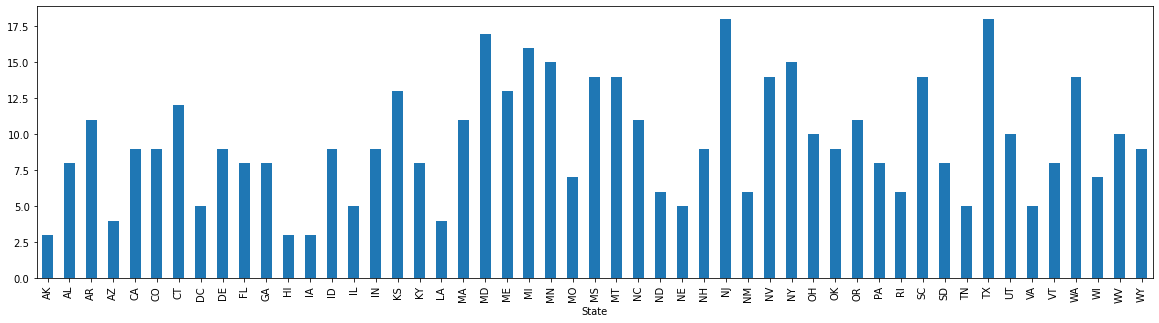

In [24]:
df4=df.groupby('State')['Churn'].describe()
df4
freq=df4['freq']
count=df4['count']
plt.rcParams['figure.figsize'] = (20, 5)
(count-freq).plot(kind='bar')

In [31]:
true_churn=df.loc[(df['Churn']==True) & (df['Voice mail plan']=='Yes')]
count_of_vmail_true=true_churn.groupby('State')['Number vmail messages'].median().rename('median_vmail_true')
false_churn=df.loc[(df['Churn']==False) & (df['Voice mail plan']=='Yes')]
count_of_vmail_false=false_churn.groupby('State')['Number vmail messages'].median().rename('median_vmail_false')

In [32]:
df6=pd.concat([count_of_vmail_true,count-freq,count_of_vmail_false],axis=1).rename(columns={0:'number_churned_persons'})
df6

,median_vmail_true,number_churned_persons,median_vmail_false
AL,29.0,8,28.0
AR,29.0,11,27.0
CA,24.5,9,31.0
CO,30.0,9,26.5
CT,37.0,12,32.5
DE,35.0,9,29.5
FL,40.5,8,28.0
GA,19.5,8,30.0
ID,29.0,9,29.0
IL,24.0,5,29.0


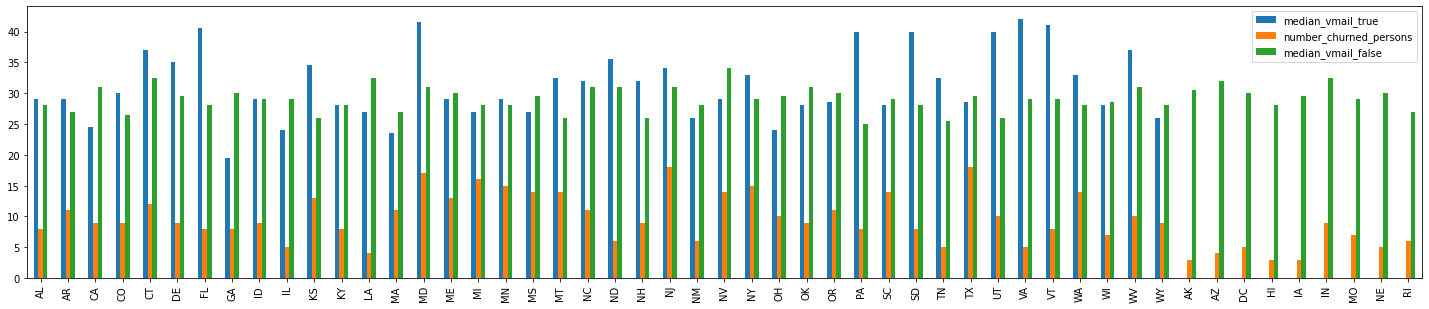

In [33]:
plt.rcParams['figure.figsize']=(25,5)
df6.plot(kind='bar')

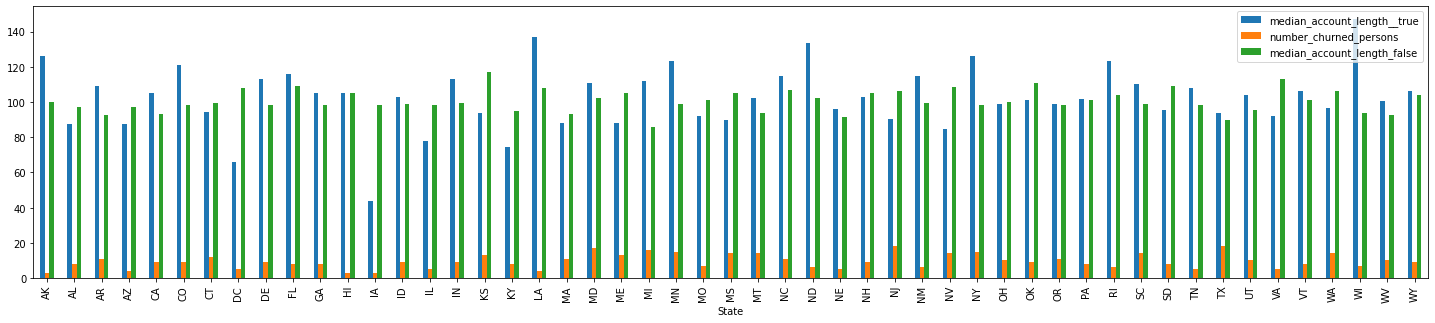

In [36]:
true_churn_absolute=df.loc[df['Churn']==True]
account_length_true=true_churn_absolute.groupby('State')['Account length'].median().rename('median_account_length__true')
false_churn_absolute=df.loc[df['Churn']==False]
account_length_false=false_churn_absolute.groupby('State')['Account length'].median().rename('median_account_length_false')
df7=pd.concat([account_length_true,count-freq,account_length_false],axis=1).rename(columns={0:'number_churned_persons'})
plt.rcParams['figure.figsize']=(25,5)
df7.plot(kind='bar')

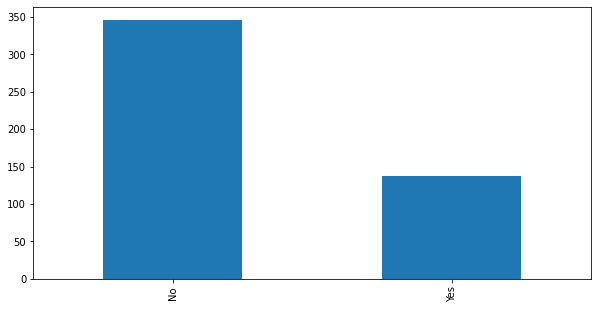

In [38]:
plt.rcParams['figure.figsize']=(10,5)
true_churn_absolute['International plan'].value_counts().plot(kind='bar')

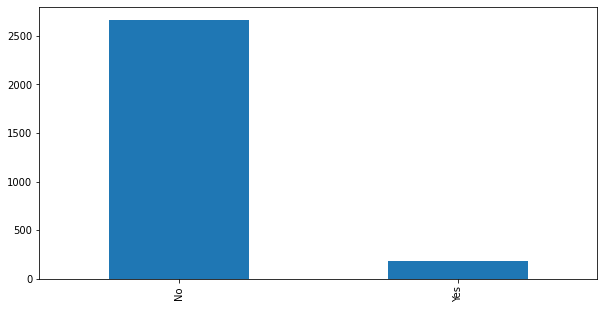

In [39]:
plt.rcParams['figure.figsize']=(10,5)
false_churn_absolute['International plan'].value_counts().plot(kind='bar')

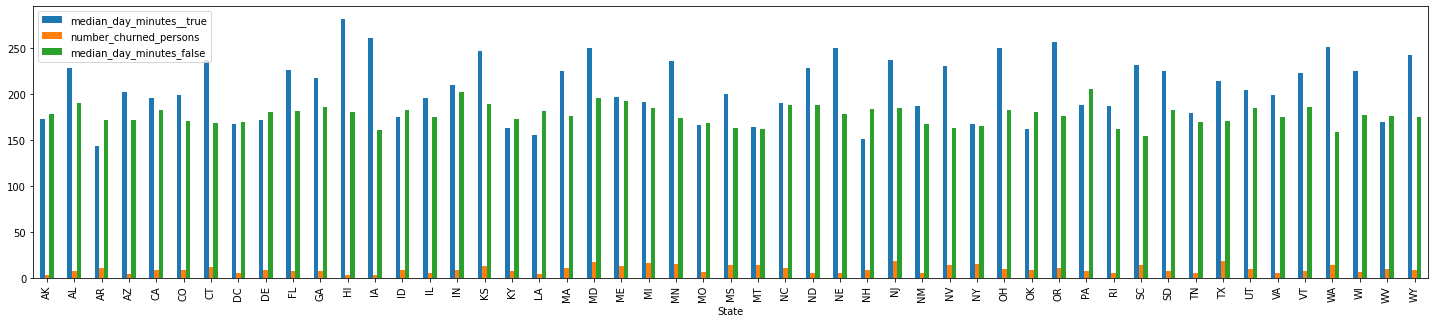

In [40]:
day_minutes_true=true_churn_absolute.groupby('State')['Total day minutes'].median().rename('median_day_minutes__true')
day_minutes_false=false_churn_absolute.groupby('State')['Total day minutes'].median().rename('median_day_minutes_false')
df9=pd.concat([day_minutes_true,count-freq,day_minutes_false],axis=1).rename(columns={0:'number_churned_persons'})
plt.rcParams['figure.figsize']=(25,5)
df9.plot(kind='bar')

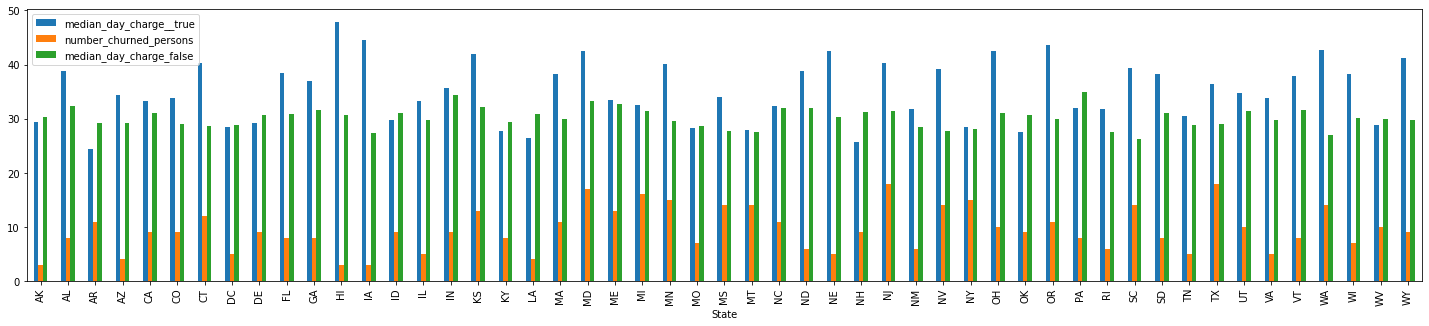

In [41]:
day_charge_true=true_churn_absolute.groupby('State')['Total day charge'].median().rename('median_day_charge__true')
day_charge_false=false_churn_absolute.groupby('State')['Total day charge'].median().rename('median_day_charge_false')
df10=pd.concat([day_charge_true,count-freq,day_charge_false],axis=1).rename(columns={0:'number_churned_persons'})
plt.rcParams['figure.figsize']=(25,5)
df10.plot(kind='bar')

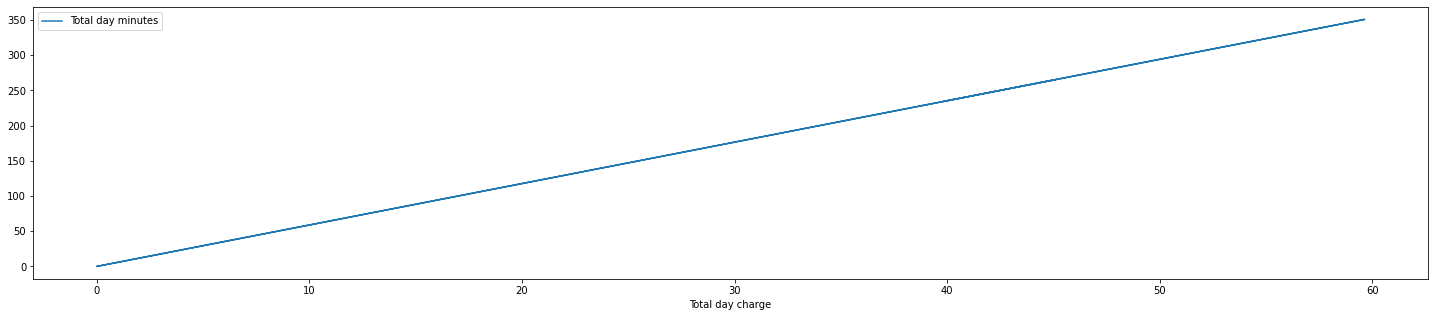

In [44]:
df[['Total day minutes','Total day charge']].set_index('Total day charge').plot()

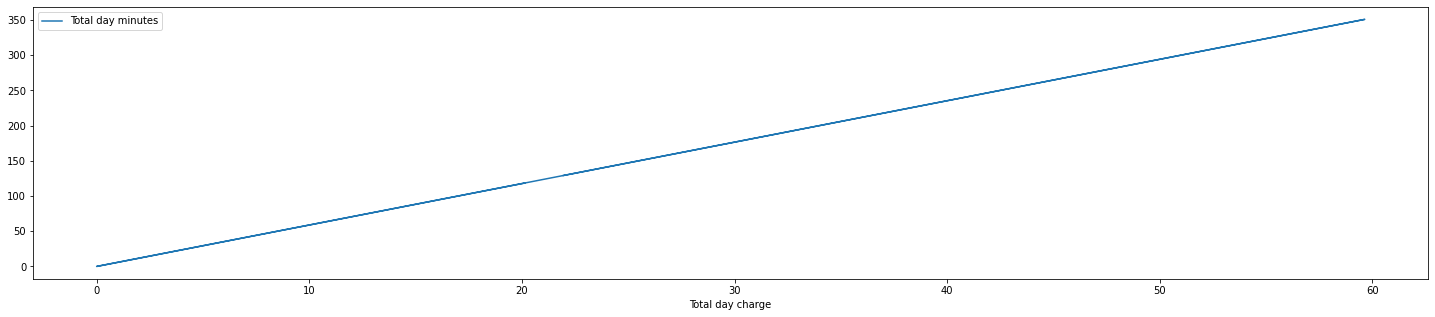

In [43]:
true_churn_absolute[['Total day minutes','Total day charge']].set_index('Total day charge').plot()

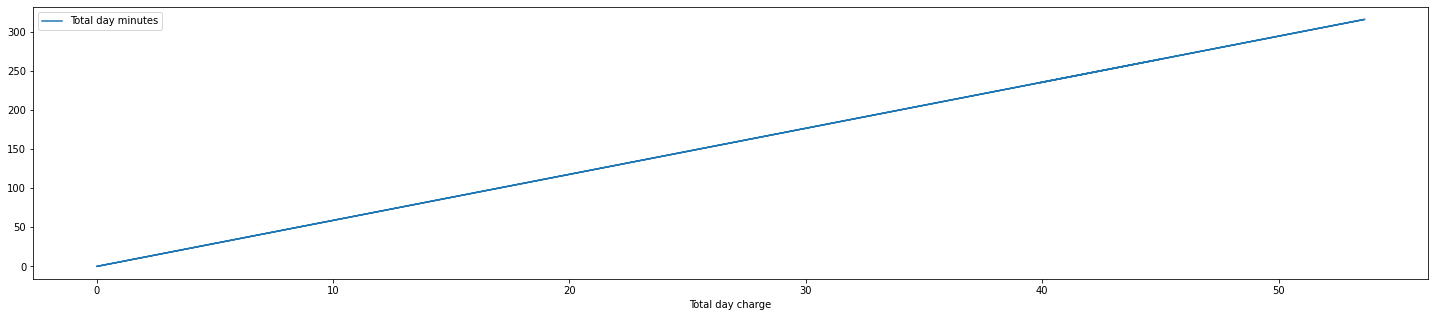

In [45]:
false_churn_absolute[['Total day minutes','Total day charge']].set_index('Total day charge').plot()

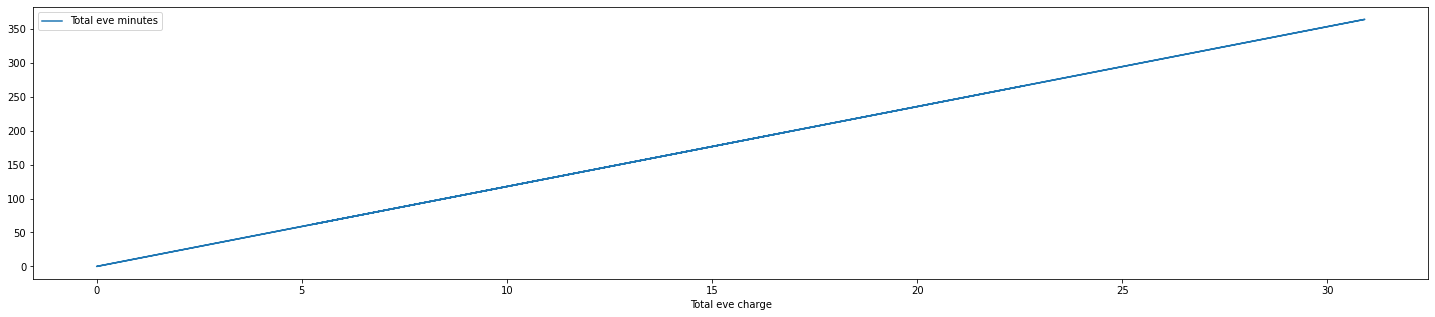

In [46]:
df[['Total eve minutes','Total eve charge']].set_index('Total eve charge').plot()

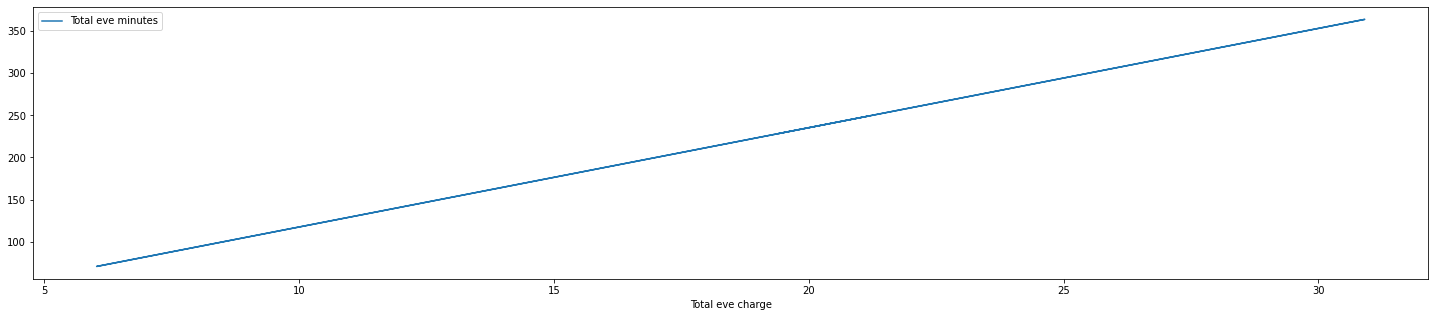

In [47]:
true_churn_absolute[['Total eve minutes','Total eve charge']].set_index('Total eve charge').plot()

In [48]:
x = df['Total day minutes']
y = df['Total day charge']
slope_intercept = np.polyfit(x,y,1)
print(slope_intercept)

[0.1699996  0.00061344]


In [49]:
x1 = true_churn_absolute['Total day minutes']
y1 = true_churn_absolute['Total day charge']
slope_intercept_1 = np.polyfit(x1,y1,1)
print(slope_intercept_1)

[0.17000123 0.00027312]


In [50]:
x2 = false_churn_absolute['Total day minutes']
y2 = false_churn_absolute['Total day charge']
slope_intercept_2 = np.polyfit(x2,y2,1)
print(slope_intercept_2)

[0.16999908 0.00070478]


In [51]:
x = df['Total eve minutes']
y = df['Total eve charge']
slope_intercept = np.polyfit(x,y,1)
print(slope_intercept)
x1 = true_churn_absolute['Total eve minutes']
y1 = true_churn_absolute['Total eve charge']
slope_intercept_1 = np.polyfit(x1,y1,1)
print(slope_intercept_1)
x2 = false_churn_absolute['Total eve minutes']
y2 = false_churn_absolute['Total eve charge']
slope_intercept_2 = np.polyfit(x2,y2,1)
print(slope_intercept_2)

[0.0849998  0.00025079]
[0.08499621 0.00091152]
[0.08500053 0.00012199]


In [52]:
x = df['Total night minutes']
y = df['Total night charge']
slope_intercept = np.polyfit(x,y,1)
print(slope_intercept)
x1 = true_churn_absolute['Total night minutes']
y1 = true_churn_absolute['Total night charge']
slope_intercept_1 = np.polyfit(x1,y1,1)
print(slope_intercept_1)
x2 = false_churn_absolute['Total night minutes']
y2 = false_churn_absolute['Total night charge']
slope_intercept_2 = np.polyfit(x2,y2,1)
print(slope_intercept_2)

[ 0.04500095 -0.00010713]
[ 0.04500215 -0.00033908]
[ 4.50007696e-02 -7.40249342e-05]


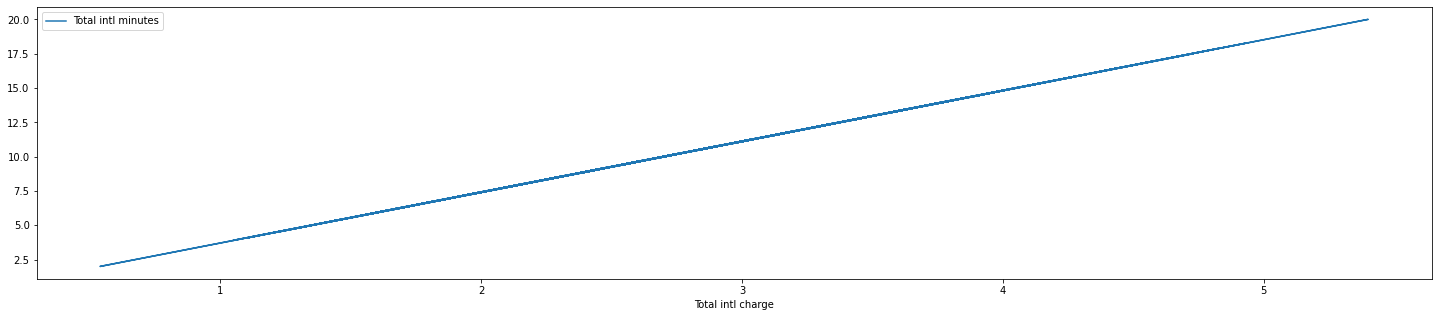

In [59]:
true_churn_absolute[['Total intl minutes','Total intl charge']].set_index('Total intl charge').plot()

In [58]:
x1 = true_churn_absolute.loc[df['International plan']=='Yes','Total intl minutes']
y1 = true_churn_absolute.loc[df['International plan']=='Yes','Total intl charge']
slope_intercept_1 = np.polyfit(x1,y1,1)
print(slope_intercept_1)
x2 = true_churn_absolute.loc[df['International plan']=='No','Total intl minutes']
y2 = true_churn_absolute.loc[df['International plan']=='No','Total intl charge']
slope_intercept_2 = np.polyfit(x2,y2,1)
print(slope_intercept_2)

[0.26997055 0.00039074]
[2.70049309e-01 2.36298105e-04]


In [60]:
x1 = false_churn_absolute.loc[df['International plan']=='Yes','Total intl minutes']
y1 = false_churn_absolute.loc[df['International plan']=='Yes','Total intl charge']
slope_intercept_1 = np.polyfit(x1,y1,1)
print(slope_intercept_1)
x2 = false_churn_absolute.loc[df['International plan']=='No','Total intl minutes']
y2 = false_churn_absolute.loc[df['International plan']=='No','Total intl charge']
slope_intercept_2 = np.polyfit(x2,y2,1)
print(slope_intercept_2)

[0.26986501 0.00180921]
[0.2699931  0.00057812]


In [61]:
true_churn_absolute['Customer service calls'].median()

2.0

In [62]:
false_churn_absolute['Customer service calls'].median()

1.0